In [25]:
!pip install japanize_matplotlib -q
!pip install ipywidgets -q

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import japanize_matplotlib
from ipywidgets import interact
warnings.simplefilter("ignore")

# 線形回帰アルゴリズム
以下のような関係式を**仮定**
$$
y=aX+b
$$
この仮定が実測値との誤差が小さくなるように**最適化** = データを用いた学習

## 単回帰のアルゴリズム

$$
データ数:N \\
次元数: 1 \\
\mathbf{y}^{true} = \begin{pmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_N
\end{pmatrix}
,
\mathbf{x} = \begin{pmatrix}
        x_1 \\
        x_2 \\
        \vdots \\
        x_N
\end{pmatrix} \\
\mathbf{y}^{pred} = a\mathbf{x}+b \\
真の値との二乗誤差の総和を考えて，それを最小化する：最小二乗法 \\
\begin{align}J(a, b) &= \frac{1}{2N}∑_{i=1}^{N}(\mathbf{y}^{true}_i - \mathbf{y}_i^{pred})^2 \\
&= \frac{1}{2N}∑_{i=1}^{N}(\mathbf{y}_i^{true} - a\mathbf{x}_i-b)^2 \\
&= \frac{1}{2N}∑_{i=1}^{N}((\mathbf{y}_i^{true})^2 + (a\mathbf{x}_i)^2 +b^2-2\mathbf{y}_i^{true}a\mathbf{x}_i-2\mathbf{y}_i^{true}b+2a\mathbf{x}_ib)\\
\end{align}\\
$$
上記は二次関数，二次関数を最小化するパラメータ（a,b）をどうやって求める？？

# 関数を最小化するパラメータを求める

次の関数を考えてみよう

$$
y=3x^2+2x+1
$$

二次関数の最小値とその最小値を与える$x$の値は？

下のグラフから、どこにありそうか予想してみよう．

Text(0.5, 1.0, '$y=3x^2+2x+1$')

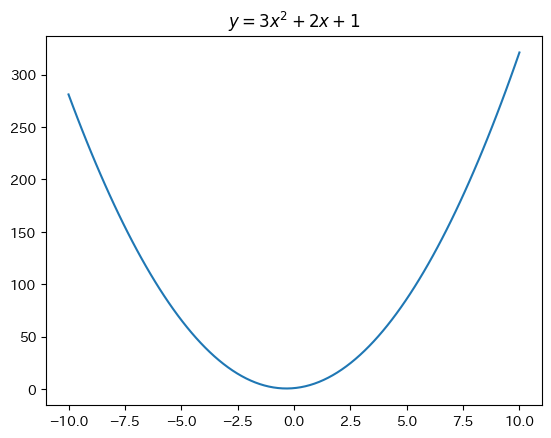

In [27]:
def g(x):
    return 3*x**2+2*x+1
arr_x = np.linspace(-10, 10, 100)
arr_y = g(arr_x)
plt.plot(arr_x, arr_y)
plt.title("$y=3x^2+2x+1$")

Text(0.5, 1.0, '$y=3x^2+2x+1$')

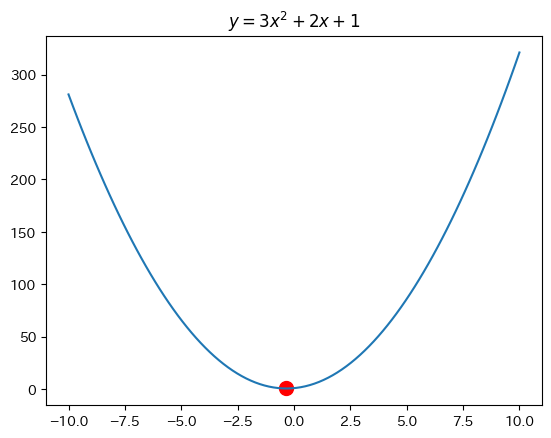

In [28]:
def g(x):
    return 3*x**2+2*x+1
arr_x = np.linspace(-10, 10, 100)
arr_y = g(arr_x)
plt.plot(arr_x, arr_y)
plt.scatter(-1/3, 2/3, c="r", s=100)
plt.title("$y=3x^2+2x+1$")

## 実は，接戦の傾き（＝その点における傾き）が０になる点が最小値になっている．
以下のコードで確認しよう．

In [29]:
#@title 接線の傾き 
def dg(x):
    return 6*x+2

def tang_g(x, a):
    return dg(a)*(x-a)+g(a)

arr_x = np.linspace(-10, 10, 100)
arr_y = g(arr_x)
plt.plot(arr_x, arr_y)
plt.title("$y=3x^2+2x+1$")

def plot_tang(a接点):
    _ = np.linspace(-10, 10, 100)
    plt.plot(_, g(_), linestyle="dashed")
    plt.scatter(a接点, g(a接点), c="r", label="x={}の傾き:{:.3f}".format(a接点, dg(a接点)))  
    plt.plot(_, tang_g(_, a接点), c="r")
    plt.ylim(-10, 350)
    plt.legend()
    plt.show()

interact(plot_tang, a接点=(-10.,10))

interactive(children=(FloatSlider(value=0.0, description='a接点', max=10.0, min=-10.0), Output()), _dom_classes=…

<function __main__.plot_tang(a接点)>

# 微分とは
関数の傾きを求める操作のこと

## 関数の傾きとは？
次の一次関数を思い出そう．
$$
y = ax+b
$$
これの傾きは？→傾き：$a$

例として$y=2x+1$を考える

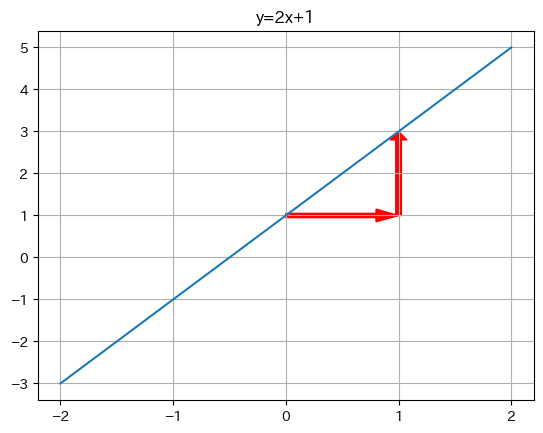

In [30]:
#@title 一次関数の傾き
def linear_func(x):
    return 2*x+1
_ = np.linspace(-2, 2, 1000)
plt.plot(_, linear_func(_))
plt.grid()
plt.xticks(np.arange(-2, 3))
plt.arrow(x=0, y=1, dx=1, dy=0, width=0.1, head_width=0.3, head_length=0.2, length_includes_head=True, color="r")
plt.arrow(x=1, y=1, dx=0, dy=2, width=0.05, head_width=0.15, head_length=0.2, length_includes_head=True, color="r")
plt.title("y=2x+1")
plt.show()

## 傾きをどうやって求めるか？
以下の公式に基づいて求める．（他の関数については，出てきたタイミングで説明します）

（証明まで含めて知りたい方は，個別に質問していただくか，調べて下さい！）

$$
f(x) = x^nという関数の微分（傾き） \\
\frac{d}{dx}(x^n) = nx^{n-1} \\
\frac{d}{dx}(c) = 0 \\ 
c:xに依らない定数 \\
$$

（例１）$y=x^2$関数の場合
$$
\frac{d}{dx}(x^2) = 2x^{2-1} = 2x \\
$$
（例２） $y=5x$ 関数の場合
$$
\frac{d}{dx}(5x) = 5× \frac{d}{dx} (x) = 5 \times 1x^{1-1} = 5 \\
$$
（例３） $y=3x^2+2x+1$関数の場合 
$$
\begin{align}\frac{d}{dx}(3x^2+2x+1) &= \frac{d}{dx}(3x^2) + \frac{d}{dx}(2x) + \frac{d}{dx}(1) \\
&= 3 × \frac{d}{dx}(x^2) + 2 ×\frac{d}{dx}(x) + \frac{d}{dx}(1) \\
&= 6x + 2
\end{align}
$$

（演習）

（１）$y=x^3$を微分してください

（２）$y=x^2+3$を微分してください

（３）$y=x^2+3x+2$の微分値に$x=-\frac{3}{2}$を代入して，その値を求めてください

## 二次関数であれば，微分の値＝０の点が最小値！
さっきのグラフ（$3x^2+2x+1$）を思い返そう．

まず，この関数を$x$で微分する．

$$
\frac{d}{dx}(3x^2+2x+1) = 6x+2 = 2(3x+1)
$$
この微分値が0になる時，つまり
$$
\frac{d}{dx}(3x^2+2x+1) = 2(3x+1) = 0
$$
の時，
$$
x=-\frac{1}{3}
$$
で$3x^2+2x+1は$最小値を取る．

$x=-\frac{1}{3}$を$y=3x^2+2x+1$に代入して，最小値を求めると，

$$
y_{min} = 3 × (-\frac{1}{3})^2 + 2×(-\frac{1}{3})+1 = \frac{1}{3}-\frac{2}{3}+1=\frac{2}{3}
$$

のように求めることができる．

実際に先ほどのグラフで確認しよう．


## 2変数関数の微分
-> 偏微分を使う

-> 注目したい変数以外を定数と見做して微分する！

（例）$x^2+y^2$を$x, y$でそれぞれ偏微分する
$$
\frac{∂}{∂x}(x^2+y^2) = 2x \\
\frac{∂}{∂y}(x^2+y^2) = 2y
$$

（例）$3x^2+4x+6y+2y^2+1$を$x, y, z$でそれぞれ偏微分する
$$
\frac{∂}{∂x}(3x^2+4x+6y+2y^2+1) = 6x+4 \\
\frac{∂}{∂y}(3x^2+4x+6y+2y^2+1) = 6+4y \\
\frac{∂}{∂z}(3x^2+4x+6y+2y^2+1) = 0
$$

これもやはり，１変数の時と同様に二次関数であれば傾きが０になる点で最小値となる．

例えば，$x^2+y^2$という関数であれば，
$$
\frac{∂}{∂x}(x^2+y^2) = 2x = 0\\
\frac{∂}{∂y}(x^2+y^2) = 2y = 0
$$
$$
x = 0 \\
y = 0
$$
で最小となる．

（演習）

（１）$x^2+y^2+2y+1$を$x,y$それぞれで偏微分してください．

（２）$x^2+3x+4+y^2+2y+1$を$x,y$それぞれで偏微分してください．

（３）（２）で最小値を取るときの$x,y$を求めてください．


## いよいよコスト関数の最小値を求める．

方針：コスト関数$J$を$a, b$で偏微分して、それぞれが０になる点を求める．

$$
\begin{align}J(a, b) &= \frac{1}{2N}∑_{i=1}^{N}({y}^{true}_i - {y}_i^{pred})^2 \\
&= \frac{1}{2N}∑_{i=1}^{N}({y}_i^{true} - a{x}_i-b)^2 \\
&= \frac{1}{2N}∑_{i=1}^{N}(({y}_i^{true})^2 + (a{x}_i)^2 +b^2-2{y}_i^{true}a{x}_i-2{y}_i^{true}b+2a{x}_ib)\\
\end{align}\\
$$
まず，コスト関数$J$を$a, b$で偏微分する．
$$
\begin{align}\frac{∂}{∂a}J(a, b) &= \frac{1}{2N}∑_{i=1}^{N}\frac{∂}{∂a}(({y}_i^{true})^2 + (a{x}_i)^2 +b^2-2{y}_i^{true}a{x}_i-2{y}_i^{true}b+2a{x}_ib)\\
&= \frac{1}{2N}∑_{i=1}^{N}(2{x_i}^2a-2{y}_i^{true}{x}_i+2{x}_ib) \\
&= \frac{1}{N}∑_{i=1}^{N}({x_i}^2a-{y}_i^{true}{x}_i+{x}_ib) = 0 \\
\frac{∂}{∂b}J(a, b) &= \frac{1}{2N}∑_{i=1}^{N}\frac{∂}{∂b}(({y}_i^{true})^2 + (a{x}_i)^2 +b^2-2{y}_i^{true}a{x}_i-2{y}_i^{true}b+2a{x}_ib) \\
&= \frac{1}{2N}∑_{i=1}^{N}(2b-2{y}_i^{true}+2a{x}_i) \\
&= \frac{1}{N}∑_{i=1}^{N}(b-{y}_i^{true}+a{x}_i) = 0 \\
\end{align}\\
$$
まとめると，
$$
\begin{align}\frac{∂}{∂a}J(a, b) &= \frac{1}{N}∑_{i=1}^{N}({x_i}^2a-{y}_i^{true}{x}_i+{x}_ib) = 0 \\
\frac{∂}{∂b}J(a, b) &= \frac{1}{N}∑_{i=1}^{N}(b-{y}_i^{true}+a{x}_i) = 0 \\
\end{align}\\
$$
これはいわゆる，二元連立一次方程式なので，中学生の時に習ったやり方で求める！

簡単のため，

$$
\begin{align}
\bar{x} &= \frac{1}{N}∑_{i=1}^{N}x_i \\
\bar{x^2} &= \frac{1}{N}∑_{i=1}^{N}x_i^2 \\
\bar{y} &= \frac{1}{N}∑_{i=1}^{N}y_i^{true} \\
\bar{xy} &=  \frac{1}{N}∑_{i=1}^{N}x_iy_i^{true}
\end{align}
$$
とおくと，
$$
\begin{align}
\frac{∂}{∂a}J(a, b) &= \bar{x^2}a-\bar{xy}+\bar{x}b = 0 \\
\frac{∂}{∂b}J(a, b) &= b-\bar{y}+a\bar{x}= 0 \\
\end{align}\\
$$
となり，これを解いて，
$$
\begin{align} 
a &= \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{x^2}-(\bar{x})^2}\\
b &= \bar{y} - a \bar{x}
\end{align}
$$
を得る．




In [31]:
# 得られた値を使って回帰モデルの傾きと切片を求めてみよう．
#X:インスタグラムの投稿数 y:年間のケーキの売り上げ(万円)
X = np.array([5, 3, 6, 11, 7, 15, 20, 1])
y = np.array([240,  110, 240, 600, 210, 580, 700, 80])
df_cake = pd.DataFrame(data={"インスタグラムの投稿数": X, "ケーキの売り上げ": y})
df_cake

,インスタグラムの投稿数,ケーキの売り上げ
0,5,240
1,3,110
2,6,240
3,11,600
4,7,210
5,15,580
6,20,700
7,1,80


Text(0, 0.5, 'earnings')

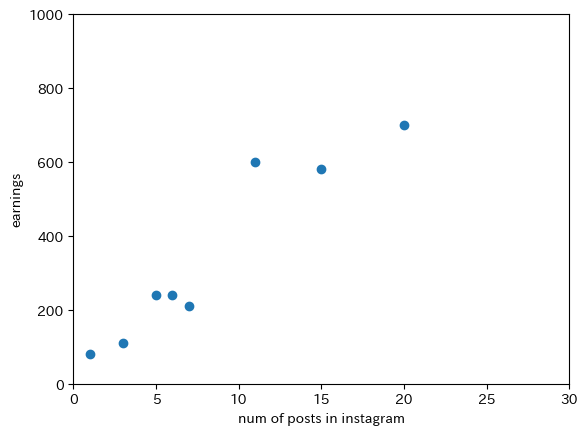

In [32]:
# 散布図を描画
plt.scatter(X, y)

# x軸の上限と下限を設定
plt.xlim(0,30)

# y軸の上限と下限を設定
plt.ylim(0, 1000)

# ラベルを設定
plt.xlabel("num of posts in instagram")
plt.ylabel("earnings")

## hints
配列の要素ごとの掛け算

```python
a = np.array([1, 2])
b = np.array([3, 4])
```
という配列の要素ごとの掛け算を計算したい（内積ではなく）
この時は，`*`演算子で行える．
```python
a*b
->array([3, 8])
```
平均値を求めたい場合は`mean()`メソッドを使う．
```python
a = np.array([1, 2, 3, 4, 5])
a.mean()
-> 3
```

```python
a = np.array([1, 2])
a**2
-> array([1, 4])
```

下記の式を元に，データから回帰係数と切片を求めよう．
$$
\begin{align} 
a &= \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{x^2}-(\bar{x})^2}\\
b &= \bar{y} - a \bar{x}
\end{align}
$$

In [33]:
from sklearn.linear_model import LinearRegression
# （復習）まず、sklearnを使って回帰係数と切片を求めてみよう．
X = X.reshape(-1,1)
# モデルインスタンスを生成．
lr = # WRITE ME

# fit()メソッドにより，データを学習させる．
# WRITE ME

# モデルインスタンスのcoef_, intercept_属性を確認し，回帰係数と切片を算出する．
# WRITE ME 

# 上記の式から，回帰係数と切片を求め，一致することを確認．
# WRITE ME

SyntaxError: ignored